In this notebook, we are showing more visualizations. 

In [1]:
#!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
#!pip install textblob
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
#!pip install -U spacy-lookups-data
#!pip install langid
#!pip install google_trans_new
#!pip uninstall googletrans
#!pip install autocorrect
#!pip install ftfy
#!pip install seaborn
#!pip install nltk
#!pip install bs4
#!pip install xgboost
#!pip install nbconvert[webpdf]

In [2]:
import itertools
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS 
#from langdetect import detect
from itertools import cycle
#import googletrans
#from googletrans import Translator
#from google_trans_new import google_translator 
from multiprocessing.dummy import Pool as ThreadPool
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn import preprocessing
#from textblob import TextBlob
#from textblob.translate import NotTranslated
import random
import operator
import math
import tqdm
import time
#import spacy
import json
#import langid
from bs4 import BeautifulSoup
from string import digits

#from autocorrect import Speller
#from ftfy import fix_encoding, fix_text, fix_text_segment, badness


### This section below contains  Useful Functions 
- As we find new functions, we will create them here.

In [3]:
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"didnt": "did not",
"doesnt": "does not",
"thats": "that is",
"wasnt": "was not",
"weren": "were not",
"theyre": "there",
"dont": "do not",
"cant": "cannot",
"arent": "are not",
"whats": "what is",
"you've": "you have"
}
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [4]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Most frequently occuring Penta-grams
def get_top_n5_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(5,5), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def fn_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def preprocess(dataset, columnsToPreprocess, regexList):
    for column in columnsToPreprocess:
        #for regex in regexList:
            #dataset[column] = removeString(dataset[column], regex)
            dataset[column] = dataset[column].apply(clean_step2)
    return dataset

def clean_step2(text):
#1)remove html tags    
   soup=BeautifulSoup(text,"html.parser")
   text=soup.get_text(separator="")
    
#2) Remove non-ASCII characters
   encoded_string = text.encode("ascii", "ignore")
   text= encoded_string.decode()
   
#3)lower case    
   text=text.lower()
   text = ' '.join([w for w in text.split()])

#4)remove punctuation       
   text = re.sub(r'[^\w\s]', '',text) 
   
#5)remove whitespaces
   text=" ".join(text.split())
 
#6)remove  digits  
   remove_digits = str.maketrans('', '', digits) 
   text = text.translate(remove_digits) 
    
#7)remove emails   
   text = re.sub(r'\S*@\S*\s?', '', text)
   
#8)remove hyperlinks
   text = re.sub(r'https?:\/\/.*\/\w*','', text)
   
#9)remove other characters   
   text=text.replace("_"," ")
  
   text=text.replace("\\"," ")
   return text   

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList


def lemmatize(stringlist):
    processed_all_documents = list()

    for desc in stringlist:
        word_tokens = word_tokenize(desc) 
    
        filtered_sentence = [] 

        # Removing Stopwords
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
    
        # Lemmetization
        lemma_word = []
        wordnet_lemmatizer = WordNetLemmatizer()
        for w in filtered_sentence:
            word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
            word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
            word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
            lemma_word.append(word3)
        words = ' '.join(lemma_word)
        processed_all_documents.append(words) 
    return processed_all_documents


# Write a function to apply to the dataset to detect garbage data
def detect_garbage(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
mydata = pd.read_csv('drive/MyDrive/datasets/input_data_after_preprocessing_for_ml.csv')
#mydata = pd.read_excel("datasets/input_data.xlsx")

In [7]:
mydata.head(20)

Unnamed: 0  ... Assignment group
0            0  ...            GRP_0
1            1  ...            GRP_0
2            2  ...            GRP_0
3            3  ...            GRP_0
4            4  ...            GRP_0
5            5  ...            GRP_0
6            6  ...            GRP_1
7            7  ...            GRP_0
8            8  ...            GRP_0
9            9  ...            GRP_0
10          10  ...            GRP_0
11          11  ...            GRP_0
12          12  ...            GRP_0
13          13  ...            GRP_0
14          14  ...            GRP_0
15          15  ...            GRP_0
16          16  ...            GRP_0
17          17  ...            GRP_3
18          18  ...            GRP_0
19          19  ...            GRP_0

[20 rows x 3 columns]

In [8]:
mydata.shape

(8500, 3)

### Creating a vector of word counts
- we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. 
- We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

###### Parameters used
- cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
- max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
- max_features — determines the number of columns in the matrix.
- n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [9]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('please')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'p

In [10]:
nltk.download('punkt')
nltk.download('wordnet')
mydata['Combined Description Cleaned'] = lemmatize(mydata['Combined Description Cleaned'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
#cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
#X=cv.fit_transform(mydata['Combined Description Cleaned'])

### Visualize top 20 uni-grams, bi-grams & tri-grams

In [12]:
#Convert most freq words to dataframe for plotting bar plot
#top_words = get_top_n_words(mydata['Combined Description Cleaned'], n=50)
#top_df = pd.DataFrame(top_words)
#top_df.columns=["Word", "Freq"]

#Barplot of most freq words
#sns.set(rc={'figure.figsize':(24,8)})
#g = sns.barplot(x="Word", y="Freq", data=top_df)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [13]:
#top2_words = get_top_n2_words(mydata['Combined Description Cleaned'], n=50)
#top2_df = pd.DataFrame(top2_words)
#top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
#sns.set(rc={'figure.figsize':(24,8)})
#h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
#h.set_xticklabels(h.get_xticklabels(), rotation=90)

In [14]:
#top3_words = get_top_n3_words(mydata['Combined Description Cleaned'], n=50)
#top3_df = pd.DataFrame(top3_words)
#top3_df.columns=["Tri-gram", "Freq"]
##print(top3_df)
#Barplot of most freq Tri-grams
#import seaborn as sns
#sns.set(rc={'figure.figsize':(24,8)})
#j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
#j.set_xticklabels(j.get_xticklabels(), rotation=90)

In [15]:
#top5_words = get_top_n5_words(mydata['Combined Description Cleaned'], n=50)
#top5_df = pd.DataFrame(top5_words)
#top5_df.columns=["Penta-gram", "Freq"]
#print(top3_df)
#Barplot of most freq Five-grams
#import seaborn as sns
#sns.set(rc={'figure.figsize':(24,8)})
##j=sns.barplot(x="Penta-gram", y="Freq", data=top5_df)
#j.set_xticklabels(j.get_xticklabels(), rotation=90)

#### Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [16]:
# iterate over rows with iterrows()
#doc = ' '
#for index, row in mydata.iterrows():
#     # access data using column names
#     doc = doc + ' ' + row['Combined Description Cleaned']

In [17]:
#doc

In [20]:
#tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#tfidf_transformer.fit(X)
# get feature names
#feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted

#doc=mydata['Combined Description Cleaned'][0]
 
#generate tf-idf for the given document
#tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
#sort the tf-idf vectors by descending order of scores
#sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
#keywords=extract_topn_from_vector(feature_names,sorted_items,50)
 
# now print the results
#print("\nAbstract:")
#print(doc)
#print("\nKeywords:")
#for k in keywords:
#    print(k,keywords[k])

## Implementing a word2vec model using a CBOW (Continuous Bag of Words) neural network architecture

### Build Vocabulary

In [21]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer(num_words=100000, char_level=False)
tokenizer.fit_on_texts(mydata['Combined Description Cleaned'])
word2id = tokenizer.word_index
#print(tokenizer.word_index)
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
#wids = [[word2id[w] for w in text.text_to_word_sequence(t)] for t in doc]

sequences=tokenizer.texts_to_sequences(mydata['Combined Description Cleaned'])

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2954
Vocabulary Sample: [('job', 1), ('receive', 2), ('password', 3), ('tool', 4), ('schedule', 5), ('work', 6), ('reset', 7), ('issue', 8), ('unable', 9), ('user', 10)]


In [22]:
#tokenizer.word_index

In [23]:
#word2id

### Build (context_words, target_word) pair generator

In [24]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [25]:
i = 0
for x, y in generate_context_word_pairs(corpus=sequences, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['login', 'issue', 'manager', 'name'] -> Target (Y): user
Context (X): ['issue', 'user', 'name', 'check'] -> Target (Y): manager
Context (X): ['user', 'manager', 'check', 'name'] -> Target (Y): name
Context (X): ['manager', 'name', 'name', 'ad'] -> Target (Y): check
Context (X): ['name', 'check', 'ad', 'reset'] -> Target (Y): name
Context (X): ['check', 'name', 'reset', 'password'] -> Target (Y): ad
Context (X): ['name', 'ad', 'password', 'advise'] -> Target (Y): reset
Context (X): ['ad', 'reset', 'advise', 'check'] -> Target (Y): password
Context (X): ['reset', 'password', 'check', 'caller'] -> Target (Y): advise
Context (X): ['password', 'advise', 'caller', 'confirm'] -> Target (Y): check
Context (X): ['advise', 'check', 'confirm', 'able'] -> Target (Y): caller


### Build CBOW Deep Network Model

In [26]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            295400    
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 2954)              298354    
Total params: 593,754
Trainable params: 593,754
Non-trainable params: 0
_________________________________________________________________
None


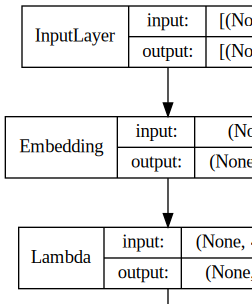

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Train model for 5 epochs

In [28]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=sequences, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 591403.9199167832

Epoch: 2 	Loss: 655421.6478287335

Epoch: 3 	Loss: 684682.6865852883

Epoch: 4 	Loss: 697925.1437989168

Epoch: 5 	Loss: 708144.670136009



### Get word embeddings

In [29]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head(20)

(2953, 100)


0         1         2   ...        97        98        99
receive  -0.864617  0.443735  0.184961  ...  0.638227 -0.028885  0.977166
password -0.123204  3.214199  1.598246  ...  1.400236  2.081694  0.218640
tool     -0.850964  1.509825  0.344415  ...  0.495021  0.443300  0.314648
schedule -0.235314  1.160526  0.819017  ...  0.405727  0.574612  0.451790
work      0.436182  0.174144  1.157050  ... -0.197110  0.512160  0.191529
reset    -0.845555  1.208051  0.568728  ...  1.294534  0.524087  0.705771
issue    -0.464330  1.779672 -0.167422  ...  0.641795  0.657538 -0.342984
unable   -0.415622  0.968014  0.685508  ...  0.447402  0.831137  0.533912
user     -0.152443  0.182958  0.982352  ...  0.789639  0.918137  0.736052
error    -0.596593  0.711228  0.506557  ...  0.348154  0.828942  0.786505
access   -0.904805  0.499601  0.914319  ...  0.607339  1.205807  0.871235
ticket   -0.856517  0.660157  0.369075  ...  0.412529  0.614084  0.411211
need     -0.992565  0.575940  0.254707  ...  0.943342  0.378826  0.355381
account  -0.614638  1.136624  0.876619  ...  0.406024  0.486171  0.834443
hello    -0.126663  0.996217  0.363889  ...  0.224022  0.916475  0.394295
company  -0.570737  0.867335  0.083890  ...  0.441018  0.438665  0.587753
help     -0.692907  1.412154  0.531115  ...  1.254650  0.773258  0.780788
get      -0.381094  1.533681  0.493248  ...  0.177085  0.649386  0.710304
network  -0.946653  1.066809  0.903382  ...  0.438909  0.889239  0.813313
system   -0.912249  1.072975  0.303109  ...  0.955491  0.734343  0.622106

[20 rows x 100 columns]

### Build a distance matrix to view the most similar words (contextually)

In [30]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['receive', 'schedule', 'work', 'password', 'ticket', 'network', 'system','lockout']}

similar_words

(2953, 2953)


{'lockout': ['frequent', 'specialist', 'validity', 'associate', 'eel'],
 'network': ['document', 'print', 'due', 'host', 'take'],
 'password': ['kindly', 'kind', 'floor', 'shop', 'every'],
 'receive': ['issue', 'subject', 'tool', 'get', 'could'],
 'schedule': ['via', 'drive', 'model', 'provide', 'destination'],
 'system': ['best', 'find', 'set', 'server', 'code'],
 'ticket': ['try', 'still', 'day', 'address', 'due'],
 'work': ['also', 'data', 'best', 'try', 'one']}

## Implementing a word2vec model using a skip-gram neural network architecture

In [31]:
### Build Vocabulary

In [32]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(mydata['Combined Description Cleaned'])

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in mydata['Combined Description Cleaned']]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2954
Vocabulary Sample: [('job', 1), ('receive', 2), ('password', 3), ('tool', 4), ('schedule', 5), ('work', 6), ('reset', 7), ('issue', 8), ('unable', 9), ('user', 10)]


### Build and View sample skip grams ((word1, word2) -> relevancy)

In [33]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(confirm (110), aba (1050)) -> 0
(user (10), login (22)) -> 1
(ad (157), payment (657)) -> 0
(check (28), manager (55)) -> 1
(manager (55), check (28)) -> 1
(name (41), able (33)) -> 1
(caller (187), check (28)) -> 1
(able (33), notice (609)) -> 0
(reset (7), reason (319)) -> 0
(name (41), duplicate (906)) -> 0


In [34]:
### Build Skip-gram Deep Network Model

In [35]:
import tensorflow as tf
from keras.layers import Concatenate
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential

word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size, )))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))

model = Sequential()
#concatted = tf.keras.layers.Concatenate([word_model, context_model])
#m = concatenate()([word_model, context_model]
model.add(Concatenate([word_model, context_model]))
model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
#model.build()
#print(model.summary())

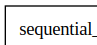

In [36]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Train the model for 5 epochs

## Leveraging gensim for building a word2vec model

In [38]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in mydata['Combined Description Cleaned']]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['ticket', 'network', 'login', 'password', 'job', 'schedule', 'issue','manager']}
similar_words

{'issue': ['whenever', 'face', 'hallan', 'await', 'unable'],
 'job': ['schedule', 'hot', 'arc', 'cluster', 'major'],
 'login': ['password', 'caller', 'sh', 'hush', 'unlock'],
 'manager': ['candy', 'importance', 'amar', 'con', 'caller'],
 'network': ['circuit', 'flap', 'secondary', 'site', 'equipment'],
 'password': ['unlock', 'lock', 'login', 'log', 'despite'],
 'schedule': ['job', 'hot', 'arc', 'cold', 'major'],
 'ticket': ['authorize', 'global', 'recreate', 'equipment', 'incident']}

## Visualizing word embeddings

In [39]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(150, 150))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Total words: 48 	Word Embedding shapes: (48, 100)


## Applying the word2vec model on our sample corpus

In [40]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in mydata['Combined Description Cleaned']]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)

## Visualize word embeddings

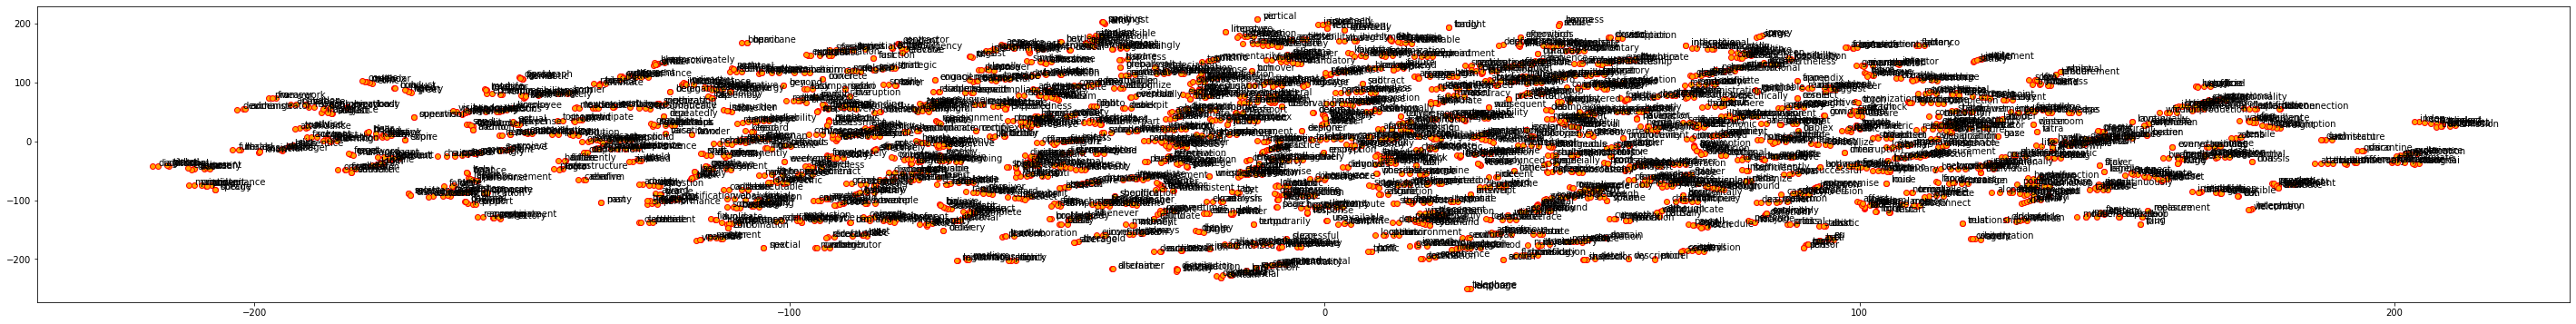

In [41]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(50, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

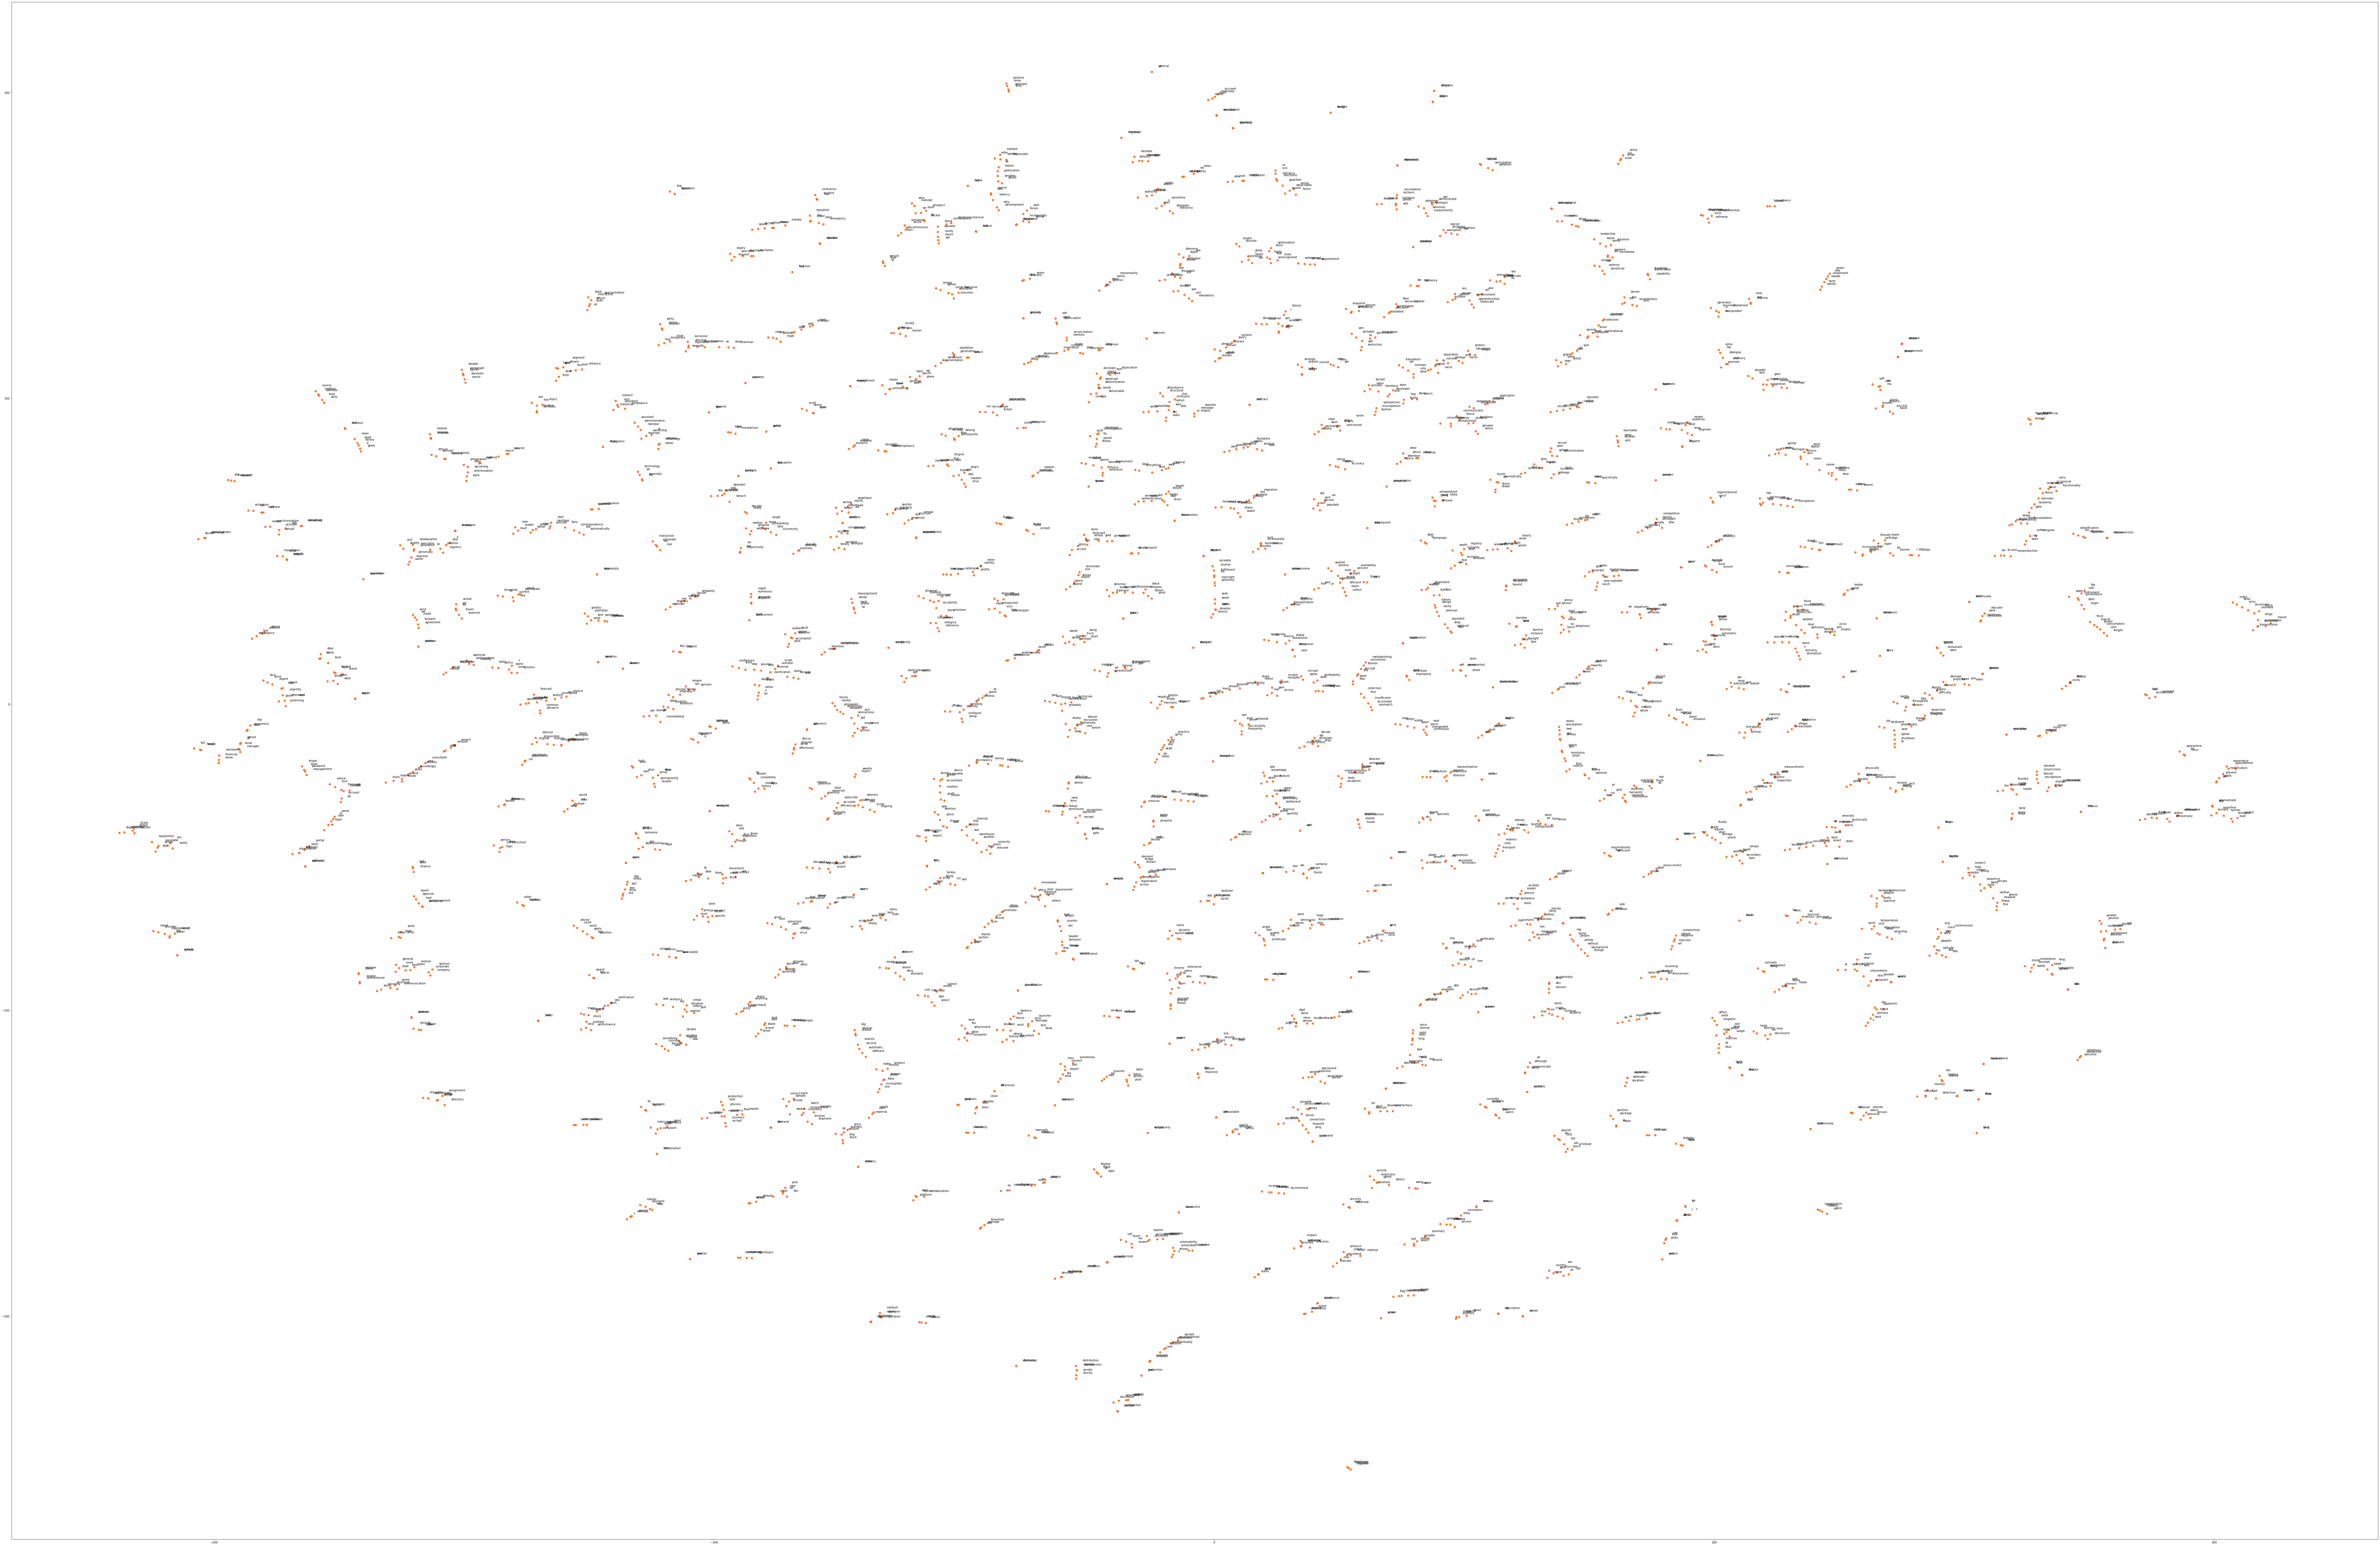

In [42]:
plt.figure(figsize=(150, 100))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(6, 6), textcoords='offset points')

In [43]:
## Sample word embedding

In [44]:
w2v_model.wv['password']

array([ 3.8143115 ,  0.05270522, -8.961964  , -0.05290617, -0.18559581,
       -2.5735347 , -0.5608132 ,  1.5894523 ,  3.6161325 , -1.1874603 ],
      dtype=float32)

In [45]:
## Build framework for getting document level embeddings

In [46]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [47]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


0         1         2  ...         7         8         9
0     0.338182 -2.522014 -5.270684  ...  0.587833  2.111446 -2.990267
1    -1.281775  0.666113 -1.791892  ...  1.444360 -0.337069 -1.281301
2    -0.029647  0.345387 -2.154046  ...  1.920132  0.354061 -0.586955
3     0.031431  0.140212  0.028725  ...  0.358126  1.246952 -0.661493
4     0.885546 -2.430432  2.415289  ... -1.153588  1.147111 -2.257593
...        ...       ...       ...  ...       ...       ...       ...
8495 -2.131810  1.203934 -1.388799  ...  1.302465 -1.413316 -0.788394
8496  0.363071  2.112142 -2.904809  ... -1.719052  0.503687 -0.897226
8497  3.776538  0.141183 -7.671887  ...  1.750921  3.408734 -0.675639
8498 -0.042680 -0.373842  0.159203  ...  0.976333 -1.096944  0.040355
8499 -1.609273 -1.402636  0.185818  ... -2.334802 -0.972520 -1.502028

[8500 rows x 10 columns]

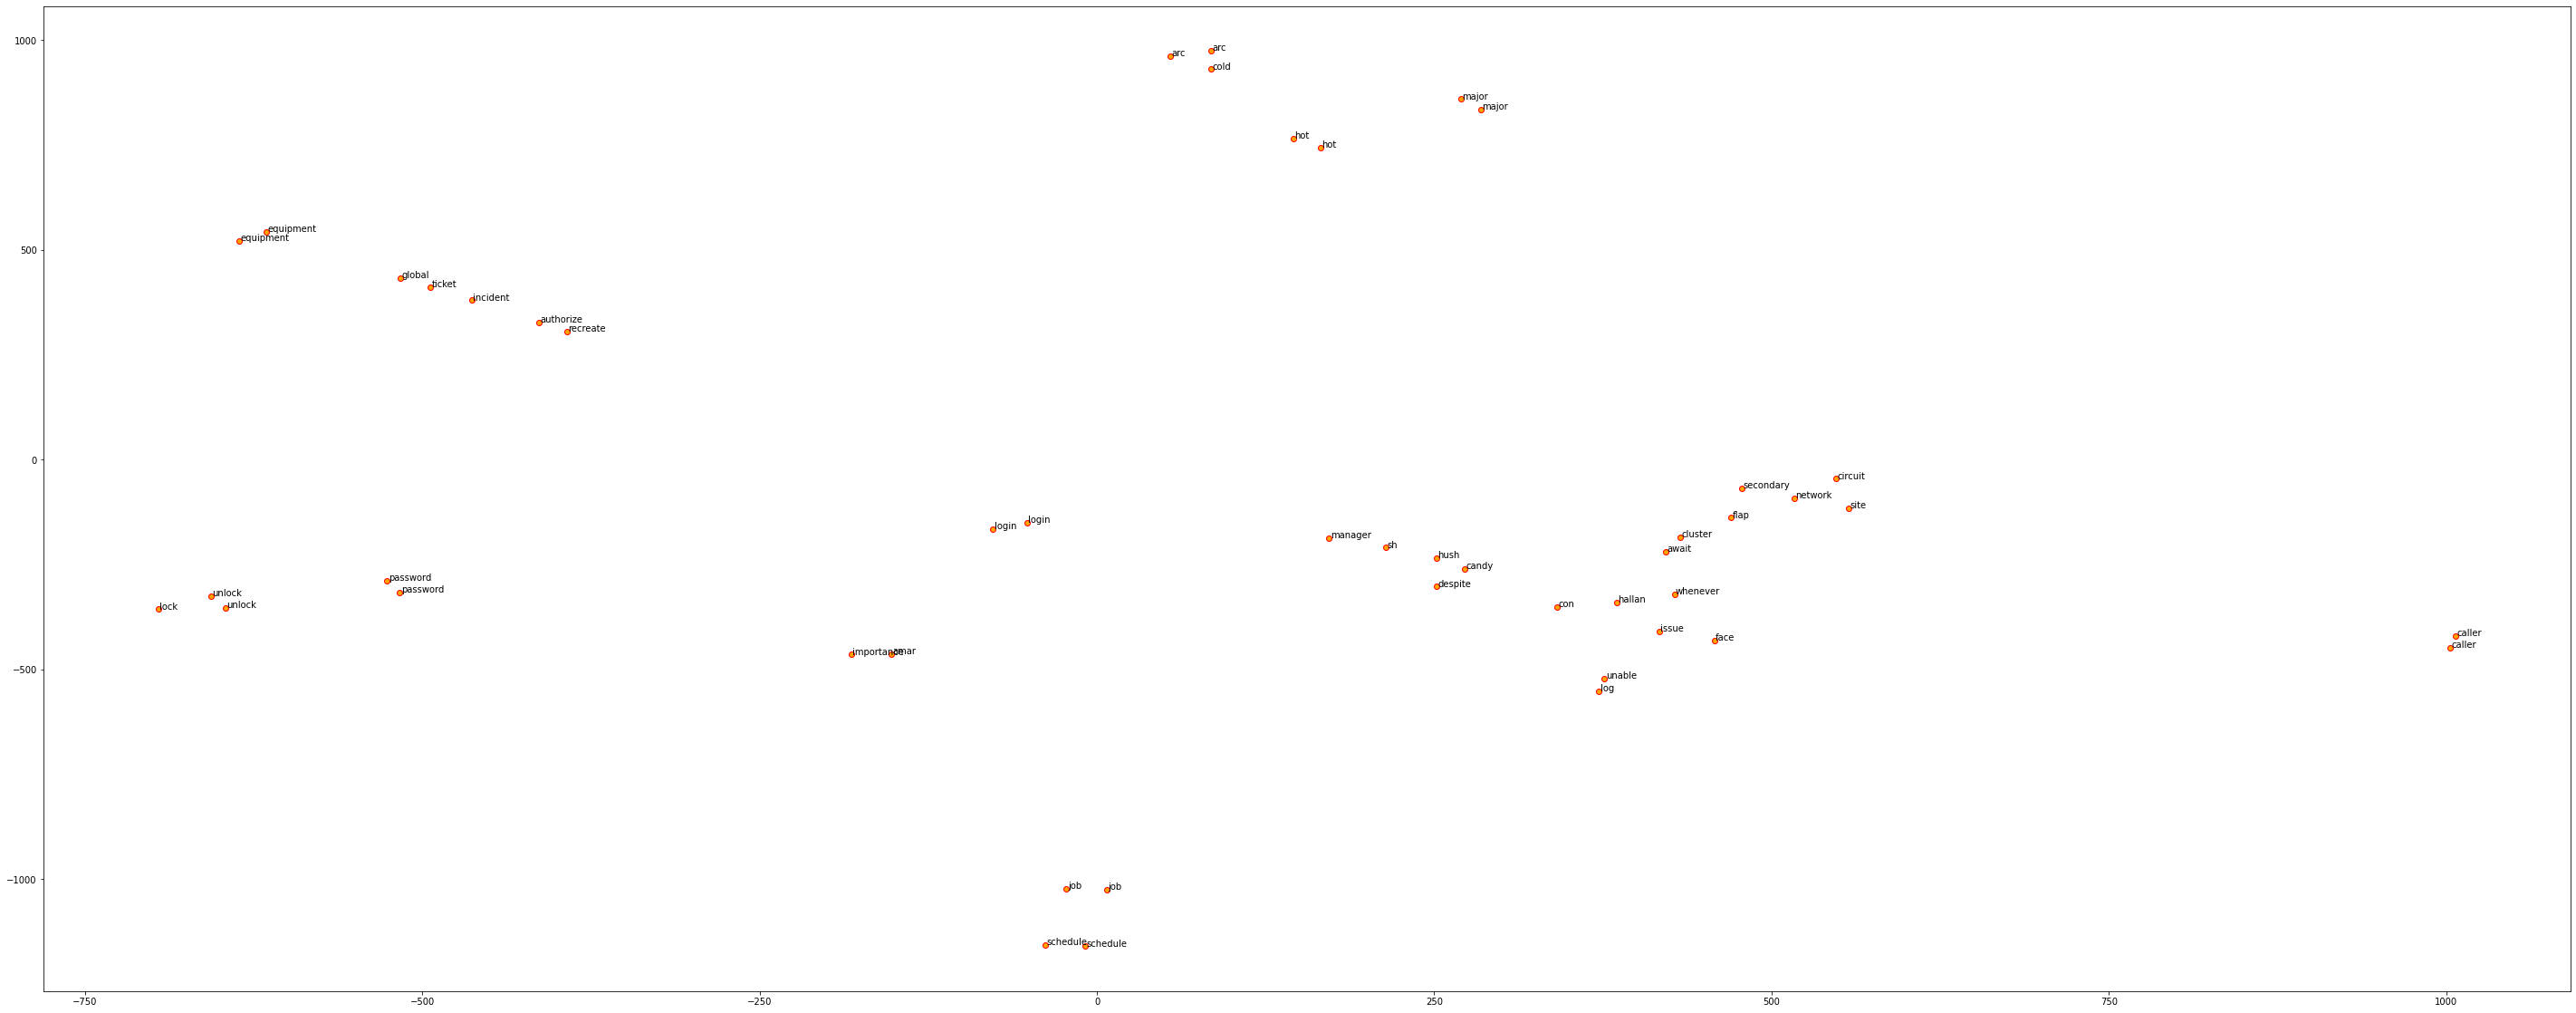

In [48]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(50, 20))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Clustering with word embeddings

In [49]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [50]:
cluster_labels.ClusterLabel.unique()

array([-1])

In [51]:
pd.concat([mydata, cluster_labels], axis=1)

Unnamed: 0  ... ClusterLabel
0              0  ...           -1
1              1  ...           -1
2              2  ...           -1
3              3  ...           -1
4              4  ...           -1
...          ...  ...          ...
8495        8495  ...           -1
8496        8496  ...           -1
8497        8497  ...           -1
8498        8498  ...           -1
8499        8499  ...           -1

[8500 rows x 4 columns]

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(mydata['Assignment group'])

In [55]:
plt.figure(figsize=(150, 150))

for i in range(len(labels)):
    label = labels[i]
    color = 'pink' if label == 'GRP_0' else 'blue' if label == 'GRP_1' else 'green' if label == 'GRP_2' else 'red'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

# Leveraging gensim for building a FastText model

In [56]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in mydata['Combined Description Cleaned']]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words


ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)

In [57]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['ticket', 'network', 'login', 'password', 'job', 'schedule', 'issue','manager']}
similar_words

{'issue': ['able', 'system', 'try', 'user', 'get'],
 'job': ['schedule', 'arc', 'cold', 'hot', 'rerun'],
 'login': ['password', 'caller', 'log', 'unlock', 'kiosk'],
 'manager': ['help', 'caller', 'management', 'able', 'account'],
 'network': ['outage', 'divestiture', 'circuit', 'power', 'yes'],
 'password': ['management', 'unlock', 'reset', 'login', 'account'],
 'schedule': ['job', 'arc', 'hot', 'cold', 'notch'],
 'ticket': ['network', 'remote', 'incident', 'yes', 'divestiture']}

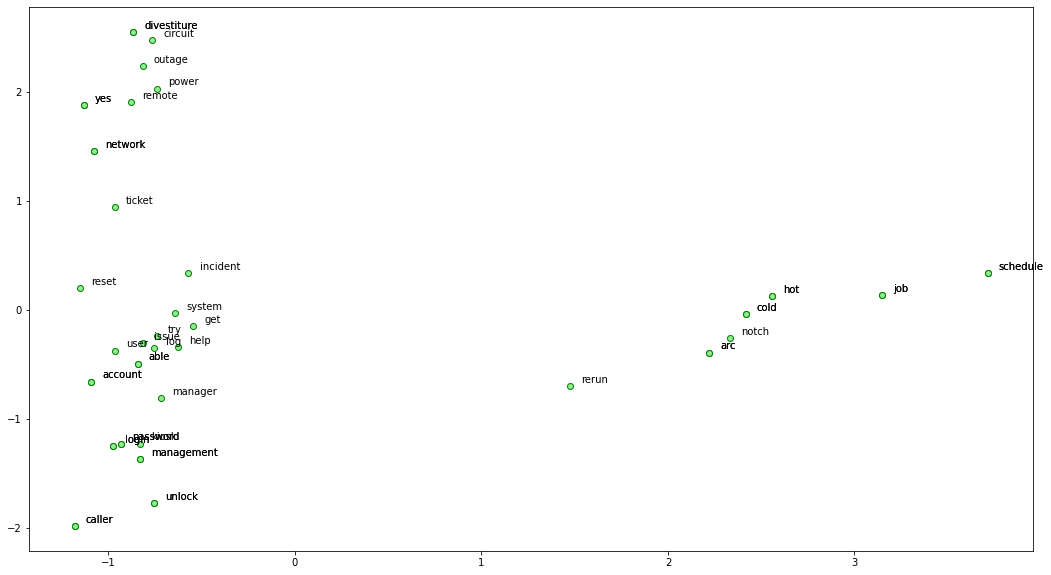

In [58]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [59]:
ft_model.wv['password']

array([ 1.5446297 , -1.1511303 ,  0.32882574,  0.1010043 , -0.67818815,
        0.02447055, -0.09886178, -1.0630168 ,  0.08923616, -0.09141435,
       -0.04404584,  0.8249292 ,  0.56676   ,  1.3429393 , -0.17115684,
       -0.29425517, -0.1179486 , -0.45826593,  1.0024077 , -0.15592849,
        0.37133124,  0.37842384, -0.68053794, -0.5339271 , -0.5466796 ,
       -0.03131835, -0.32638147,  0.2884983 , -0.19873421,  0.06396794,
        0.24317019,  0.7035616 ,  0.25182322,  0.50850296, -0.7712174 ,
       -0.43609968,  0.08894607,  0.06180023,  0.5910414 ,  0.35237667,
        0.14478727,  0.23396397, -0.5094725 ,  0.20169699, -0.65025735,
       -0.7766249 ,  0.03335838,  0.07729065, -0.42601272,  0.48632082,
       -0.22965725,  0.7127792 , -1.1011778 , -0.20152022,  0.12177623,
        0.03613087,  0.423849  ,  0.9190912 ,  0.29737264, -0.15047152,
        0.08674557, -1.0975012 ,  0.69481343,  0.25166246, -0.20079763,
        0.46836647,  0.9623229 , -0.36760548,  0.39346242,  0.27

In [60]:
print(ft_model.wv.similarity(w1='password', w2='reset'))
print(ft_model.wv.similarity(w1='network', w2='remote'))

0.3345292
0.19714819


In [62]:
st1 = "network remote password reset"
print('network remote password reset [',st1, ']:', ft_model.wv.doesnt_match(st1.split()))

st2 = "network remote password reset"
print('network remote password reset [',st2, ']:', ft_model.wv.doesnt_match(st2.split()))

network remote password reset [ network remote password reset ]: password
network remote password reset [ network remote password reset ]: password


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
